In [3]:
from IPython.display import display, Markdown

markdown = """
On va ici essayer d'étendre notre étude à l'intérieur des territoires, essayer de déceler des structures urbaines intra-territoriales. L'intérêt étant qu'on souhaite contourner le problème du manque de données cabecera pour le département de la capitale Bogota. La seconde raison est d'exploiter la richesse des données Colombienne, notamment la variable Utilrank qui est une spécificité Colombienne, pour essayer de mieux comprendre la structure urbaine à l'intérieur des territoires. On va étudier spécifiquement Bogota et voir si sa structure suit l'hypothèse monocentrique.

En termes de méthodes, rien de nouveau : on sélectionne les variables d'amenités avec un LASSO. Meme chose que dans 4_lasso, sauf que l'échantillon est réduit et on n'a plus la variable de territoire. Ensuite, on regarde les coefficients et p-valeurs de Utilrank.
"""
display(Markdown(markdown))


On va ici essayer d'étendre notre étude à l'intérieur des territoires, essayer de déceler des structures urbaines intra-territoriales. L'intérêt étant qu'on souhaite contourner le problème du manque de données cabecera pour le département de la capitale Bogota. La seconde raison est d'exploiter la richesse des données Colombienne, notamment la variable Utilrank qui est une spécificité Colombienne, pour essayer de mieux comprendre la structure urbaine à l'intérieur des territoires. On va étudier spécifiquement Bogota et voir si sa structure suit l'hypothèse monocentrique.

En termes de méthodes, rien de nouveau : on sélectionne les variables d'amenités avec un LASSO. Meme chose que dans 4_lasso, sauf que l'échantillon est réduit et on n'a plus la variable de territoire. Ensuite, on regarde les coefficients et p-valeurs de Utilrank.


In [1]:
import pandas as pd

total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 



In [101]:
bogota = total_dataset_clean
bogota['DPTO'] = pd.to_numeric(bogota['DPTO'], errors='coerce')
bogota = bogota[bogota['DPTO']==11]

745     2746.535202
746     3721.893018
747     3879.347831
748     4219.963001
749     3264.525349
           ...     
8477    4452.870790
8478    3996.445507
8479    2008.355425
8480    4590.060261
8486    5904.077240
Name: fex_c_2011, Length: 723, dtype: float64

In [14]:
# on relance une procedure LASSO sans la variable territory 

variables = ['level_educ','age', 'marital_status','gender', 'own_status','Numrooms', 'Numroomsleep', 'Sanserv1', 'Sanserv2', 'Garbdisp', 'Watserv', 'Kitchen', 'Fuelc',
             'Phone_service', 'tvservice', 'Internet_service', 'Washing', 'Refrigerator', 'Blender', 'Stove',
             'Oven', 'Microwave', 'Water_heater', 'ColorTV', 'Computer', 'AirCond', 'typeofbuilding', 'Stereo',
             'Floor', 'Wallsmaterial','Garbcollectfreq','Dummyelec',
             'Utilrank', 'Naturalgas', 'Sewage_system', 'Garbcollect', 'Aqueduct', 'Frequencewat']

In [25]:
# ici, on cherche toutes les variables categorielles qui demandent une transformation en dummy variable 

#value_counts_dict = {} #si on veut les value counts
value_counts_dict = []

# boucle qui filtre les var categorielles (sans prendre les var qu'on ne veut pas transformer)
for col in variables:
    unique_values_count = bogota[col].nunique()
    if unique_values_count and col not in ['Numrooms', 'Numroomsleep','age']:
        #value_counts_dict[col] = bogota[col].value_counts()   #pour avoir le compte. on a juste besoin du nom des vars 
        value_counts_dict.append(col)
print("Variables categorielles à preprocesser:")
print(value_counts_dict)
data = bogota[value_counts_dict]


for column in value_counts_dict: #on cree les dummies puis on concatene
    dummies = pd.get_dummies(data[column], prefix=column, dtype=float, drop_first=True)
    data = pd.concat([data, dummies], axis=1)

data = data.drop(value_counts_dict, axis=1) #base de preprocessing clean, il manque les variables 
data

Variables categorielles à preprocesser:
['level_educ', 'marital_status', 'gender', 'own_status', 'Sanserv1', 'Sanserv2', 'Garbdisp', 'Watserv', 'Kitchen', 'Fuelc', 'Phone_service', 'tvservice', 'Internet_service', 'Washing', 'Refrigerator', 'Blender', 'Stove', 'Oven', 'Microwave', 'Water_heater', 'ColorTV', 'Computer', 'AirCond', 'typeofbuilding', 'Stereo', 'Floor', 'Wallsmaterial', 'Garbcollectfreq', 'Dummyelec', 'Utilrank', 'Naturalgas', 'Sewage_system', 'Garbcollect', 'Aqueduct', 'Frequencewat']


,level_educ_3.0,level_educ_4.0,level_educ_5.0,level_educ_6.0,marital_status_2.0,marital_status_3.0,marital_status_4.0,marital_status_5.0,gender_2.0,own_status_1,Sanserv2_2.0,Watserv_10.0,Kitchen_2.0,Kitchen_3.0,Kitchen_6.0,Fuelc_3.0,Fuelc_4.0,Fuelc_5.0,Phone_service_2.0,tvservice_2.0,Internet_service_2.0,Washing_2.0,Refrigerator_2.0,Blender_2.0,Stove_2.0,Oven_2.0,Microwave_2.0,Water_heater_2.0,ColorTV_2.0,Computer_2.0,AirCond_2.0,typeofbuilding_2.0,Stereo_2.0,Floor_3.0,Floor_4.0,Floor_5.0,Floor_6.0,Garbcollectfreq_3.0,Garbcollectfreq_4.0,Utilrank_2.0,Utilrank_3.0,Utilrank_4.0,Utilrank_5.0,Utilrank_6.0,Naturalgas_2.0,Frequencewat_2.0
745,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
746,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
747,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
748,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
749,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8478,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8479,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8480,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
from sklearn.preprocessing import MinMaxScaler

# on transforme nos variables continues 
scaler = MinMaxScaler()
data_preprocess = scaler.fit_transform(bogota[['Numrooms', 'Numroomsleep']])
data_preprocess = pd.DataFrame(data_preprocess, columns=['Numrooms', 'Numroomsleep'])
data_preprocess


,Numrooms,Numroomsleep
0,0.428571,0.4
1,0.142857,0.0
2,0.000000,0.0
3,0.428571,0.2
4,0.142857,0.0
...,...,...
718,0.285714,0.2
719,0.000000,0.0
720,0.428571,0.4
721,0.285714,0.2


In [27]:
age = pd.DataFrame(bogota["age"], columns = ["age"])
age

,age
745,44.0
746,70.0
747,24.0
748,27.0
749,32.0
...,...
8477,48.0
8478,51.0
8479,40.0
8480,36.0


In [34]:
data.reset_index(drop=True, inplace=True)
data_preprocess.reset_index(drop=True, inplace=True)
age.reset_index(drop=True, inplace=True)
# on cree notre base pour la regression : on concatene les trois bases precedentes
X = pd.concat([data, data_preprocess], axis=1)
X = pd.concat([X, age], axis=1)
X

,level_educ_3.0,level_educ_4.0,level_educ_5.0,level_educ_6.0,marital_status_2.0,marital_status_3.0,marital_status_4.0,marital_status_5.0,gender_2.0,own_status_1,Sanserv2_2.0,Watserv_10.0,Kitchen_2.0,Kitchen_3.0,Kitchen_6.0,Fuelc_3.0,Fuelc_4.0,Fuelc_5.0,Phone_service_2.0,tvservice_2.0,Internet_service_2.0,Washing_2.0,Refrigerator_2.0,Blender_2.0,Stove_2.0,Oven_2.0,Microwave_2.0,Water_heater_2.0,ColorTV_2.0,Computer_2.0,AirCond_2.0,typeofbuilding_2.0,Stereo_2.0,Floor_3.0,Floor_4.0,Floor_5.0,Floor_6.0,Garbcollectfreq_3.0,Garbcollectfreq_4.0,Utilrank_2.0,Utilrank_3.0,Utilrank_4.0,Utilrank_5.0,Utilrank_6.0,Naturalgas_2.0,Frequencewat_2.0,Numrooms,Numroomsleep,age
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.4,44.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,0.0,70.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,24.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.2,27.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.2,48.0
719,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,51.0
720,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.4,40.0
721,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.2,36.0


In [35]:
# on cree la base de la variable dependente a predire
y = bogota['log_imputed_rent_uc']
y.reset_index(drop=True, inplace=True)

# et fin du preprocessing, on droppe les NaN
X_y = pd.concat([X,y],axis=1)
X_y = X_y.dropna()

y = X_y['log_imputed_rent_uc']
X = X_y.drop('log_imputed_rent_uc', axis=1)
X

,level_educ_3.0,level_educ_4.0,level_educ_5.0,level_educ_6.0,marital_status_2.0,marital_status_3.0,marital_status_4.0,marital_status_5.0,gender_2.0,own_status_1,Sanserv2_2.0,Watserv_10.0,Kitchen_2.0,Kitchen_3.0,Kitchen_6.0,Fuelc_3.0,Fuelc_4.0,Fuelc_5.0,Phone_service_2.0,tvservice_2.0,Internet_service_2.0,Washing_2.0,Refrigerator_2.0,Blender_2.0,Stove_2.0,Oven_2.0,Microwave_2.0,Water_heater_2.0,ColorTV_2.0,Computer_2.0,AirCond_2.0,typeofbuilding_2.0,Stereo_2.0,Floor_3.0,Floor_4.0,Floor_5.0,Floor_6.0,Garbcollectfreq_3.0,Garbcollectfreq_4.0,Utilrank_2.0,Utilrank_3.0,Utilrank_4.0,Utilrank_5.0,Utilrank_6.0,Naturalgas_2.0,Frequencewat_2.0,Numrooms,Numroomsleep,age
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.4,44.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,0.0,70.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,24.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.2,27.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142857,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.2,48.0
719,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,51.0
720,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571,0.4,40.0
721,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.285714,0.2,36.0


In [36]:
############# Premiere regression LASSO pour selectionner les variables d'amenites

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import numpy as np

# on cree nos donnees de training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cross-validation 
lasso_model = LassoCV(alphas=np.logspace(-15, 15, 200), cv=5, max_iter=10000)

# et on fitte avec les donnees de training
lasso_model.fit(X_train, y_train)

/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22720519661828575, tolerance: 0.02166797495240206
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2199988393048784, tolerance: 0.020815224341918112
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6656415452723081, tolerance: 0.02094332139144695
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: Con

LassoCV(alphas=array([1.00000000e-15, 1.41499130e-15, 2.00220037e-15, 2.83309610e-15,
       4.00880633e-15, 5.67242607e-15, 8.02643352e-15, 1.13573336e-14,
       1.60705282e-14, 2.27396575e-14, 3.21764175e-14, 4.55293507e-14,
       6.44236351e-14, 9.11588830e-14, 1.28989026e-13, 1.82518349e-13,
       2.58261876e-13, 3.65438307e-13, 5.17092024e-13, 7.31680714e-13,
       1.03532184e-12, 1.46497140e-1...
       3.40928507e+11, 4.82410870e+11, 6.82607183e+11, 9.65883224e+11,
       1.36671636e+12, 1.93389175e+12, 2.73644000e+12, 3.87203878e+12,
       5.47890118e+12, 7.75259749e+12, 1.09698580e+13, 1.55222536e+13,
       2.19638537e+13, 3.10786619e+13, 4.39760361e+13, 6.22257084e+13,
       8.80488358e+13, 1.24588336e+14, 1.76291412e+14, 2.49450814e+14,
       3.52970730e+14, 4.99450512e+14, 7.06718127e+14, 1.00000000e+15]),
        cv=5, max_iter=10000)

In [37]:
from sklearn.linear_model import Lasso

optimal_alpha = lasso_model.alpha_ #notre alpha optimal
optimal_alpha_original_scale = 10**optimal_alpha

# avec ce alpha optimal, on reconduit une reg lasso, pour enfin selectionner les variables avec ce alpha optimal (donc minimisation du squared error)
lasso_final = Lasso(alpha=optimal_alpha)

# et on fitte le modele sur les donnes d'entrainement
lasso_final.fit(X_train, y_train)

# on extirpe les variables selectionnees 
pd.set_option('display.max_columns', None) #on veut voir toutes les colonnes de la base
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_final.coef_})

to_exclude = coefficients_df[coefficients_df['Coefficient'].abs()==0]
to_exclude = [element.split('_')[0] for element in to_exclude['Variable']]
to_exclude = list(set(to_exclude))

others = coefficients_df[coefficients_df['Coefficient'].abs()!=0]
others = [element.split('_')[0] for element in others['Variable']]
others = list(set(others))
features = list(set(others)-set(to_exclude))
 

# renomme les vars avec des underscores 

# petit dictionnaire
replacement_dict = {'Internet': 'Internet_service', 'Phone': 'Phone_service', 'Water': 'Water_heater', 'Sewage': 'Sewage_system',
'own':'own_status', 'level':'level_educ', 'marital':'marital_status'}

# on renomme
features = [replacement_dict.get(col, col) for col in features]


In [44]:
optimal_alpha_original_scale

1.0018714123142827

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse #MSE 

0.17387045588531655

In [40]:
test_score = lasso_model.score(X_test, y_test)
test_score #R2

0.6142773730623005

In [42]:
features
# les caracteristiques marital_status et level_educ ont ete supprimes 
# on les reintegre dans le deuxieme LASSO

['Naturalgas',
 'Oven',
 'Refrigerator',
 'Blender',
 'age',
 'own_status',
 'Stereo',
 'Water_heater',
 'Numrooms',
 'Washing',
 'Microwave',
 'tvservice',
 'Sanserv2',
 'ColorTV',
 'Numroomsleep',
 'Phone_service',
 'Internet_service',
 'Utilrank',
 'Watserv',
 'typeofbuilding',
 'AirCond']

In [62]:
############# VIF 
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_for_vif = bogota[features].copy()

#drop na
data_for_vif.dropna(inplace=True)

# VIF pour chaque var
vif_data = pd.DataFrame()
vif_data["Variable"] = data_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_for_vif.values, i) for i in range(data_for_vif.shape[1])]

high_vif_variables = vif_data[vif_data["VIF"]>50]["Variable"].tolist()

#on supprime les VIF
features_after_removal = [var for var in features if var not in high_vif_variables]

data_after_removal = bogota[features_after_removal].copy()

data_after_removal.reset_index(drop=True, inplace=True)

In [63]:
data_after_removal = data_after_removal.drop(["Numroomsleep", "Numrooms"], axis=1)
dummies = pd.get_dummies(data_after_removal, prefix=column, dtype=float, drop_first=True)

soc = pd.DataFrame(bogota[['marital_status','level_educ','gender','log_imputed_rent_uc','Numrooms','Numroomsleep']], columns = ['marital_status','level_educ','gender','log_imputed_rent_uc','Numrooms','Numroomsleep'])
scaler = MinMaxScaler()
rooms = scaler.fit_transform(soc[['Numrooms', 'Numroomsleep']])
soc = soc.drop(["Numroomsleep", "Numrooms"], axis=1)
rooms = pd.DataFrame(rooms, columns=['Numrooms',"Numroomsleep"])

soc.reset_index(drop=True, inplace=True)
dummies.reset_index(drop=True, inplace=True)
rooms.reset_index(drop=True, inplace=True)

clean  = pd.concat([dummies,soc],axis=1)
clean = pd.concat([clean,rooms],axis=1)
clean = clean.dropna()

,Naturalgas,Oven,Refrigerator,Blender,age,own_status,Stereo,Water_heater,Washing,Microwave,tvservice,Sanserv2,ColorTV,Phone_service,Internet_service,Utilrank,Watserv,marital_status,level_educ,gender,log_imputed_rent_uc,Numrooms,Numroomsleep
0,1.0,2.0,1.0,1.0,44.0,0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,3.0,6.0,2.0,12.899220,0.428571,0.4
1,1.0,2.0,1.0,1.0,70.0,0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,12.670429,0.142857,0.0
2,1.0,2.0,1.0,2.0,24.0,0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,5.0,1.0,12.871100,0.000000,0.0
3,1.0,1.0,1.0,1.0,27.0,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,6.0,1.0,13.671670,0.428571,0.2
4,1.0,2.0,1.0,1.0,32.0,0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,12.216382,0.142857,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,1.0,2.0,1.0,1.0,48.0,0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,5.0,2.0,12.909529,0.285714,0.2
719,1.0,2.0,1.0,1.0,51.0,0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,4.0,1.0,12.899220,0.000000,0.0
720,1.0,1.0,1.0,1.0,40.0,0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,5.0,1.0,12.562956,0.428571,0.4
721,1.0,2.0,1.0,1.0,36.0,0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,5.0,1.0,11.884489,0.285714,0.2


In [64]:
X = clean.drop(['log_imputed_rent_uc'], axis=1)
y = clean['log_imputed_rent_uc'] 

In [66]:

############ deuxieme LASSO/ nested LASSO 

from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

#cross validation pour determiner le alpha optimal 

from sklearn.linear_model import LassoCV

# LassoCV model avec cross-validation
lasso_model2 = LassoCV(alphas=np.logspace(-25, 0, 200), cv=5, max_iter=100)

# on fitte les donnees avec les data_train2
lasso_model2.fit(X_train2, y_train2)

/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16127542870350453, tolerance: 0.020630153559399744
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.415916777645549, tolerance: 0.020630153559399744
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.406628283852577, tolerance: 0.020630153559399744
  model = cd_fast.enet_coordinate_descent_gram(
/opt/mamba/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: Co

LassoCV(alphas=array([1.00000000e-25, 1.33545156e-25, 1.78343088e-25, 2.38168555e-25,
       3.18062569e-25, 4.24757155e-25, 5.67242607e-25, 7.57525026e-25,
       1.01163798e-24, 1.35099352e-24, 1.80418641e-24, 2.40940356e-24,
       3.21764175e-24, 4.29700470e-24, 5.73844165e-24, 7.66341087e-24,
       1.02341140e-23, 1.36671636e-23, 1.82518349e-23, 2.43744415e-23,
       3.25508860e-23, 4.34701316e-2...
       1.28989026e-03, 1.72258597e-03, 2.30043012e-03, 3.07211300e-03,
       4.10265811e-03, 5.47890118e-03, 7.31680714e-03, 9.77124154e-03,
       1.30490198e-02, 1.74263339e-02, 2.32720248e-02, 3.10786619e-02,
       4.15040476e-02, 5.54266452e-02, 7.40196000e-02, 9.88495905e-02,
       1.32008840e-01, 1.76291412e-01, 2.35428641e-01, 3.14403547e-01,
       4.19870708e-01, 5.60716994e-01, 7.48810386e-01, 1.00000000e+00]),
        cv=5, max_iter=100)

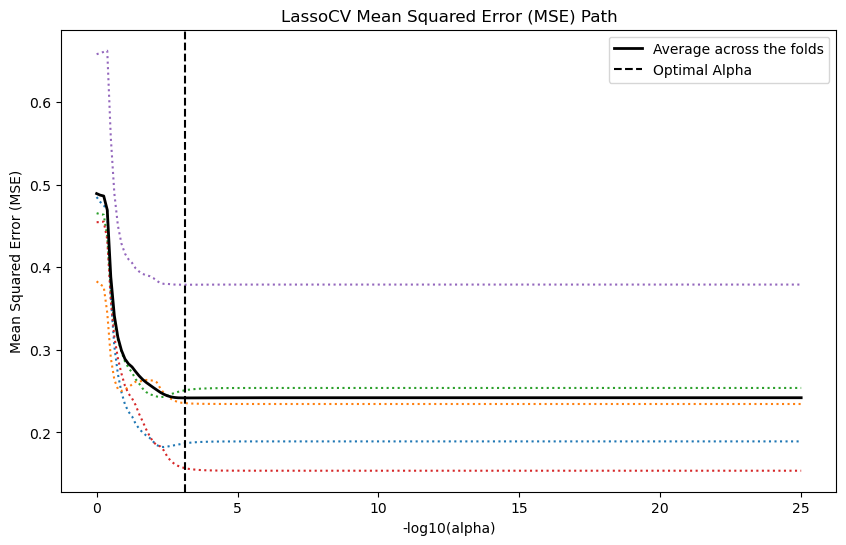

In [68]:
import matplotlib.pyplot as plt

# plot alpha optimal 
m_log_alphas = -np.log10(lasso_model2.alphas_)

plt.figure(figsize=(10, 6))
plt.plot(m_log_alphas, lasso_model2.mse_path_, ':')
plt.plot(m_log_alphas, lasso_model2.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_model2.alpha_), linestyle='--', color='k', label='Optimal Alpha')

plt.legend()
plt.xlabel('-log10(alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('LassoCV Mean Squared Error (MSE) Path')
plt.show() 

In [69]:
test_score = lasso_model2.score(X_test2, y_test2)
print(f'R-squared: {test_score}')


R-squared: 0.5393612594797318


In [70]:
optimal_alpha2 = lasso_model2.alpha_
optimal_alpha_original_scale2 = 10**optimal_alpha2
print(f'Alpha optimal: {optimal_alpha_original_scale2}')

Alpha optimal: 1.0016667630072231


In [72]:
lasso_model2_selec = Lasso(alpha=optimal_alpha2)  # utilise le alpha optimal
lasso_model2_selec.fit(X_train2, y_train2)

#on applique aux datas test et on calcule le MSE
y_pred2 = lasso_model2_selec.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred2)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.20764005588304038


In [74]:
coefficients_df2 = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_model2_selec.coef_})
coefficients_df2
tokeep = [element.split('_')[0] for element in coefficients_df2['Variable']]
tokeep = list(set(tokeep))
tokeep

['Naturalgas',
 'Oven',
 'Refrigerator',
 'Blender',
 'age',
 'own',
 'Stereo',
 'level',
 'Water',
 'Washing',
 'tvservice',
 'Sanserv2',
 'Microwave',
 'Numrooms',
 'ColorTV',
 'marital',
 'Numroomsleep',
 'Phone',
 'gender',
 'Internet',
 'Utilrank',
 'Watserv']

In [76]:
to_exclude = coefficients_df2[coefficients_df2['Coefficient'].abs()==0]
to_exclude = [element.split('_')[0] for element in to_exclude['Variable']]
to_exclude = list(set(to_exclude))
to_exclude # rien n'a ete exclus. on garde cette liste donc

[]

In [77]:
#renommer 
tokeep = [replacement_dict.get(col, col) for col in tokeep]

print(f'Les covariables retenues :{tokeep}')

Les covariables retenues :['Naturalgas', 'Oven', 'Refrigerator', 'Blender', 'age', 'own_status', 'Stereo', 'level_educ', 'Water_heater', 'Washing', 'tvservice', 'Sanserv2', 'Microwave', 'Numrooms', 'ColorTV', 'marital_status', 'Numroomsleep', 'Phone_service', 'gender', 'Internet_service', 'Utilrank', 'Watserv']


In [113]:
rooms = scaler.fit_transform(bogota[['Numrooms', 'Numroomsleep']])
rooms = pd.DataFrame(rooms, columns=['Numrooms', 'Numroomsleep'])
rooms.reset_index(drop=True, inplace=True)

In [117]:
y = bogota[['log_imputed_rent_uc', 'fex_c_2011']]
X = bogota[tokeep]

X.reset_index(drop=True, inplace=True)
X = X.drop(['Numrooms', 'Numroomsleep'],axis=1)
y.reset_index(drop=True, inplace=True)

data_bogota_reg = pd.concat([X, rooms], axis=1)
data_bogota_reg = pd.concat([data_bogota_reg, y], axis=1).dropna()
data_bogota_reg['Utilrank'] = data_bogota_reg['Utilrank'].astype(int)

#### regressions avec bogota tout seul 
##### on regresse en utilisant les poids fex_c_2011, car notre echantillon est reduit

#creer des poids 
total_fex_c_2011 = data_bogota_reg['fex_c_2011'].sum()
data_bogota_reg['fex_c_2011_ratio'] = data_bogota_reg['fex_c_2011'] / total_fex_c_2011


In [118]:
data_bogota_reg

,Naturalgas,Oven,Refrigerator,Blender,age,own_status,Stereo,level_educ,Water_heater,Washing,tvservice,Sanserv2,Microwave,ColorTV,marital_status,Phone_service,gender,Internet_service,Utilrank,Watserv,Numrooms,Numroomsleep,log_imputed_rent_uc,fex_c_2011,fex_c_2011_ratio
0,1.0,2.0,1.0,1.0,44.0,0,1.0,6.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,1.0,3,1.0,0.428571,0.4,12.899220,2746.535202,0.001062
1,1.0,2.0,1.0,1.0,70.0,0,1.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1,1.0,0.142857,0.0,12.670429,3721.893018,0.001439
2,1.0,2.0,1.0,2.0,24.0,0,2.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1,1.0,0.000000,0.0,12.871100,3879.347831,0.001500
3,1.0,1.0,1.0,1.0,27.0,1,2.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3,1.0,0.428571,0.2,13.671670,4219.963001,0.001631
4,1.0,2.0,1.0,1.0,32.0,0,1.0,5.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1,1.0,0.142857,0.0,12.216382,3264.525349,0.001262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,1.0,2.0,1.0,1.0,48.0,0,2.0,5.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2,1.0,0.285714,0.2,12.909529,4452.870790,0.001721
719,1.0,2.0,1.0,1.0,51.0,0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,2.0,1.0,1.0,3,1.0,0.000000,0.0,12.899220,3996.445507,0.001545
720,1.0,1.0,1.0,1.0,40.0,0,2.0,5.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2,1.0,0.428571,0.4,12.562956,2008.355425,0.000776
721,1.0,2.0,1.0,1.0,36.0,0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2,1.0,0.285714,0.2,11.884489,4590.060261,0.001775


In [133]:
markdown = """
On utilise un Weighted OLS avec les poids de sondage, car l'échantillon est petit (autour de 700 observations). 
Petite remarque : on utilise ici les poids de sondage pour notre regression car l'echantillon est petit et les regressions ponderees permettent de recouvrir des estimateurs convergents. Cependant, ils sont moins efficaces. Comme nous avions un echantillon de bonne taille dans les precedentes regressions, nous avons privilégié l'efficacité sur la consistence.
"""
display(Markdown(markdown))


On utilise un Weighted OLS avec les poids de sondage, car l'échantillon est petit (autour de 700 observations). 
Petite remarque : on utilise ici les poids de sondage pour notre regression car l'echantillon est petit et les regressions ponderees permettent de recouvrir des estimateurs convergents. Cependant, ils sont moins efficaces. Comme nous avions un echantillon de bonne taille dans les precedentes regressions, nous avons privilégié l'efficacité sur la consistence.


In [122]:
from statsmodels.iolib.summary2 import summary_col

#weighted ols 

mod = smf.wls(formula='log_imputed_rent_uc ~ Naturalgas + Oven + Refrigerator + Blender + age + C(own_status) + Stereo + C(level_educ) + Water_heater + Washing + tvservice + Sanserv2 + Microwave + Numrooms + ColorTV + C(marital_status) + Numroomsleep + Phone_service + gender + Internet_service + C(Utilrank) + Watserv', data=data_bogota_reg,weights=data_bogota_reg['fex_c_2011_ratio'])
res = mod.fit()
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender'])
display(summary_table)

,OLS
Numrooms,1.0502***
,(0.1828)
age,0.0012
,(0.0016)
gender,-0.0474
,(0.0389)
Intercept,13.5472***
,(0.3022)
C(own_status)[T.1],0.0335
,(0.0419)


In [129]:
X = res.model.exog
vif = pd.DataFrame()
vif["Variable"] = res.params.index
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

,Variable,VIF
0,Intercept,333.754812
1,C(own_status)[T.1],1.511837
2,C(level_educ)[T.3.0],17.575887
3,C(level_educ)[T.4.0],9.249446
4,C(level_educ)[T.5.0],24.479261
5,C(level_educ)[T.6.0],24.451067
6,C(marital_status)[T.2.0],2.216881
7,C(marital_status)[T.3.0],2.087310
8,C(marital_status)[T.4.0],1.752289
9,C(marital_status)[T.5.0],1.587332


In [130]:
corr = bogota[['age','level_educ']].corr()
display(corr) 

markdown = """
La variable level_educ est tres correlee à level_educ mais c'est pas grave si ces deux variables ne sont pas significatives : ce sont des controles sociodemographiques
elles sont tres correlees entre elles // a part ces variables, rien a signaler 

Revenons aux coefficients et aux p-valeurs trouvés de la regression pondérée des probabilités d'inclusion des individus: 
"""
display(Markdown(markdown))

,age,level_educ
age,1.000000,-0.402661
level_educ,-0.402661,1.000000



level_educ est tres correlee à level_educ
mais c'est pas grave si ces deux variables ne sont pas significatives : ce sont des controles sociodemographiques
elles sont tres correlees entre elles // a part ces variables, rien a signaler 

Revenons aux coefficients et aux p-valeurs trouvés : 


In [131]:
display(res.summary().tables[1])


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13.5472,0.302,44.832,0.000,12.954,14.141
C(own_status)[T.1],0.0335,0.042,0.801,0.424,-0.049,0.116
C(level_educ)[T.3.0],-0.0815,0.171,-0.478,0.633,-0.416,0.253
C(level_educ)[T.4.0],-0.0473,0.177,-0.267,0.790,-0.395,0.300
C(level_educ)[T.5.0],-0.0881,0.173,-0.509,0.611,-0.428,0.252
C(level_educ)[T.6.0],0.0608,0.177,0.343,0.732,-0.287,0.409
C(marital_status)[T.2.0],-0.2228,0.053,-4.195,0.000,-0.327,-0.119
C(marital_status)[T.3.0],-0.2802,0.059,-4.756,0.000,-0.396,-0.164
C(marital_status)[T.4.0],-0.0671,0.058,-1.160,0.246,-0.181,0.046
C(marital_status)[T.5.0],-0.0022,0.082,-0.027,0.979,-0.164,0.159


In [147]:
markdown = """
Tous les coefficients sauf ceux d'Utilrank, deux categories du statut marital, Numrooms et Numroomsleep sont significatifs à 0.1%. Il n'est pas grave que les coefficients des variables sociocategoriques et les amenités ne soient pas significatifs, car ils sont des variables qui contrôlent de ces caractéristiques.  

Toutes les autres variables agissent comme des contrôles. Il est interessant de voir tout de même pour le statut marital (la reference de marital_status etant 1: celibataire), que un individu en couple (==2) ou marié (==3) ont un coût de logement plus faible, par unité de consommation - c'est cohérent à cause de la composition du ménage (deux individus en couple dépensent moins par tête en logement qu'une personne célibataire). Pour cette même variable catégorielle, on voit aussi qu'etre divorce (==5) ou veuf (==6) ne permet pas de conclure sur le coût de la vie selon ces catégories de populations.  Mais on peut dire que pour un veuf (==6) en moyenne, il n'y a pas de différence entre entre célibataire (==1, la référence) et etre veuf (==6, car la p-valeur est presque egale à 1, donc pas d'écarts par rapport à la catégorie de référence)  
Cela nous conforte que les résultats de cette regression sont exploitables car cohérents. 

Donc la variable Utilrank isole à présent la richesse individuelle selon son habitation (interaction richesse x territoire). En effet, le rang d'utilités que paie un individu dépend du logement où il habite, chaque logement en Colombie est évalué et assigné un rang Utilrank ([(Medina, (2007), p.44)](https://www.jstor.org/stable/20060492): "To improve the targeting of subsidies, by 1968 the Junta Nacional de Tar ifas (JNT), the Colombian institution in charge of determining public utility services rates and monitoring utilities' compliance with rates, introduced two features : 
new features to the targeting mechanisms: the definition of a basic consump tion level, which would have the higher subsidized rates, and a different IBP (Increasing block pricing) structure contingent on housing appraisal") 

Ainsi, l'ajout d'amenités permet d'isoler la richesse individuelle selon le territoire, vu que le rang est détermine selon les caractéristiques (amenités) du logement. Donc la variable Utilrank peut expliquer la mixité spatiale observée ; elle dépend de où se situent les habitations à Utilrank élevées.
Quant aux coefficients d'Utilrank, on voit que plus la catégorie Utilrank est elevée, et plus les dépenses en logement sont importantes. 

On serait tenté de dire que Bogota suit une structure monocentrique, si on s'en tient à l'hypothèse du gradient logement-distance : les individus plus riches peuvent consommer plus dans le poste de logement, et donc des logements plus en demande (Utilrank plus élevé). Mais on ne peut pas être sur de la répartition spatiale des logements plus en demande (répartition spatiale d'Utilrank). En effet, il faudrait approfondir avec des données communales, car la taille de Bogota demande une etude avec une echelle plus fine (plus de 10 fois la superficie de Paris et plus de 3 fois sa population).

De plus, la variable Utilrank suit une distribution quasi-normale, donc il est aussi possible qu'Utilrank soit distribué spatialement de facon uniforme/aléatoire dans le département de Bogota, et ainsi, les coefficients d'Utilrank expliqueraient une répartition pluricentrique de la population à l'intérieur du territoire de Bogota : il y aurait plusieurs centres urbains où la demande / consommation en logement est plus élevée qu'en moyenne. Mais encore une fois, il faudrait étudier plus finement le territoire. C'est donc un début de réponse concernant la potentielle structure intra-territoriale du département de Bogota. Pour le reste du territoire, nos analyses soutiennent une organisation urbaine adoptant une structure monocentrique du gradient logement-transport.   

"""
display(Markdown(markdown))


Tous les coefficients sauf ceux d'Utilrank, deux categories du statut marital, Numrooms et Numroomsleep sont significatifs à 0.1%. Il n'est pas grave que les coefficients des variables sociocategoriques et les amenités ne soient pas significatifs, car ils sont des variables qui contrôlent de ces caractéristiques.  

Toutes les autres variables agissent comme des contrôles. Il est interessant de voir tout de même pour le statut marital (la reference de marital_status etant 1: celibataire), que un individu en couple (==2) ou marié (==3) ont un coût de logement plus faible, par unité de consommation - c'est cohérent à cause de la composition du ménage (deux individus en couple dépensent moins par tête en logement qu'une personne célibataire). Pour cette même variable catégorielle, on voit aussi qu'etre divorce (==5) ou veuf (==6) ne permet pas de conclure sur le coût de la vie selon ces catégories de populations.  Mais on peut dire que pour un veuf (==6) en moyenne, il n'y a pas de différence entre entre célibataire (==1, la référence) et etre veuf (==6, car la p-valeur est presque egale à 1, donc pas d'écarts par rapport à la catégorie de référence)  
Cela nous conforte que les résultats de cette regression sont exploitables car cohérents. 

Donc la variable Utilrank isole à présent la richesse individuelle selon son habitation (interaction richesse x territoire). En effet, le rang d'utilités que paie un individu dépend du logement où il habite, chaque logement en Colombie est évalué et assigné un rang Utilrank ([(Medina, (2007), p.44)](https://www.jstor.org/stable/20060492): "To improve the targeting of subsidies, by 1968 the Junta Nacional de Tar ifas (JNT), the Colombian institution in charge of determining public utility services rates and monitoring utilities' compliance with rates, introduced two features : 
new features to the targeting mechanisms: the definition of a basic consump tion level, which would have the higher subsidized rates, and a different IBP (Increasing block pricing) structure contingent on housing appraisal") 

Ainsi, l'ajout d'amenités permet d'isoler la richesse individuelle selon le territoire, vu que le rang est détermine selon les caractéristiques (amenités) du logement. Donc la variable Utilrank peut expliquer la mixité spatiale observée ; elle dépend de où se situent les habitations à Utilrank élevées.
Quant aux coefficients d'Utilrank, on voit que plus la catégorie Utilrank est elevée, et plus les dépenses en logement sont importantes. 

On serait tenté de dire que Bogota suit une structure monocentrique, si on s'en tient à l'hypothèse du gradient logement-distance : les individus plus riches peuvent consommer plus dans le poste de logement, et donc des logements plus en demande (Utilrank plus élevé). Mais on ne peut pas être sur de la répartition spatiale des logements plus en demande (répartition spatiale d'Utilrank). En effet, il faudrait approfondir avec des données communales, car la taille de Bogota demande une etude avec une echelle plus fine (plus de 10 fois la superficie de Paris et plus de 3 fois sa population).

De plus, la variable Utilrank suit une distribution quasi-normale, donc il est aussi possible qu'Utilrank soit distribué spatialement de facon uniforme/aléatoire dans le département de Bogota, et ainsi, les coefficients d'Utilrank expliqueraient une répartition pluricentrique de la population à l'intérieur du territoire de Bogota : il y aurait plusieurs centres urbains où la demande / consommation en logement est plus élevée qu'en moyenne. Mais encore une fois, il faudrait étudier plus finement le territoire. C'est donc un début de réponse concernant la potentielle structure intra-territoriale du département de Bogota. Pour le reste du territoire, nos analyses soutiennent une organisation urbaine adoptant une structure monocentrique du gradient logement-transport.   



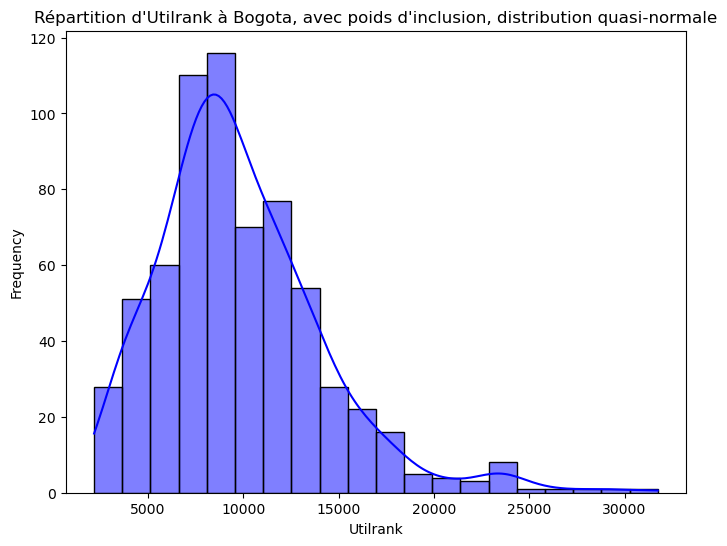

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns  

data_bogota_reg["Utilrank_weights"] = data_bogota_reg['Utilrank']*data_bogota_reg['fex_c_2011']

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data_bogota_reg["Utilrank_weights"] , bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Répartition d\'Utilrank à Bogota, avec poids d\'inclusion, distribution quasi-normale')
plt.xlabel('Utilrank')
plt.ylabel('Frequency')
plt.show()

Bibliographie : 

[Medina et al. (2007) Stratification and Public Utility Services in Colombia: Subsidies to Households or Distortion of Housing Prices? Economía, Vol. 7, No. 2 (Spring, 2007), pp. 41-99](https://www.jstor.org/stable/20060492) 